In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# today = time.strftime('%m-%d-%y')

In [3]:
# read in our FSO tracker and Smartsheets DataFrames
FSO = pd.read_excel("State-Field and all trackers/FSO Tracker.xlsx")
ss = pd.read_excel("State-Field and all trackers/Northern Branch Phase II Debris Removal Ops.xlsx")

In [4]:
# ss.info(verbose=True)

In [5]:
# FSO.info()

In [19]:
#Selecct comluns to review for FSO tracker
#comment section to see waiting ECQC field checks in this case
fso1 = FSO[['APN','FSO Pass/Fail','Field Team QC Erosion', 'Comments', 'FSO Complete', 'FSO Sent to County']]

In [20]:
# Debris crew is the location of the card on smart sheets
Sheets1= ss[["APN",'Street #','Street Name',"Debris Crew", "Erosion Control Waiver", 'County']]

In [21]:
# combined our data frams use outer to keep all data as is. 
FSO_SmartSheets = Sheets1.merge(fso1,
                     left_on='APN',
                     right_on='APN',
                     how='outer')

In [22]:
FSO_SmartSheets.set_index('APN', inplace=True)

# Need 75% to be field checked for contract requirements

In [8]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
# Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. 
# In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were 
# transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") 
# while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, 
# but it will usually end up saving you at least a little time.

c:\users\jacque.trahan\appdata\local\programs\python\python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
FSO['Field Team QC Erosion'] = FSO['Field Team QC Erosion'].astype(str).fillna('None')

In [10]:
#make everything lowercase
FSO['Field Team QC Erosion'] = FSO['Field Team QC Erosion'].str.lower()

In [11]:
# get ride of white spaces
FSO['Field Team QC Erosion'] = FSO['Field Team QC Erosion'].str.strip()

In [12]:
status = FSO['Field Team QC Erosion'].unique()
status.sort()
status

array(['ecw', 'fail', 'nan', 'no form', 'pass'], dtype=object)

In [13]:
matches = fuzzywuzzy.process.extract('pass', status, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('pass', 100), ('nan', 29), ('fail', 25), ('ecw', 0), ('no form', 0)]

In [14]:
# function to replace differnt vareations in our columns
def replace_matches_in_columns(df, column, string_to_match, min_ratio= 89):
    #get a list of unique strings
    strings = df[column].unique()
    
    #get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    # only get matches with a ratio > 89
    close_matches = [matches[0] for matches in matches if matches[1] >=min_ratio]
    
    #get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    #replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    
    #print all done
    print('All done!')
    

In [15]:
replace_matches_in_columns(df=FSO, column='Field Team QC Erosion',string_to_match='pass')

All done!


In [16]:
check = FSO['Field Team QC Erosion'].unique()
check.sort()
check

array(['ecw', 'fail', 'nan', 'no form', 'pass'], dtype=object)

In [17]:
Field_passes = (FSO['Field Team QC Erosion'] =='pass').sum()

In [23]:
total_SS_complete = (FSO_SmartSheets['Debris Crew'] == 'FSO Complete').sum()

In [24]:
(Field_passes/total_SS_complete) * 100

70.06220839813375

In [48]:
ss.head()

,APN,Structural Status,# of Trees,Haz Trees Assessment,Haz Trees,Haz Tree Only,Hazard Tree Status,Street #,Unit #,Street Name,...,Tree Felling Complete,Tree Removal Complete,Number of Hazard Trees Felled,Trees Final Site Walk,Modified Date,duplicate,Sync Status,Ineligible Date,Soils Hold Reason,Butte Alt Program Tree Property
0,071-360-010-000,Returned to County,0.0,2020-12-08,No,NaN,No Hazard Trees,1879,NaN,Lumpkin Road,...,NaT,NaT,NaN,NaT,2021-10-20 11:11:25,NaN,NaN,NaT,NaN,NaN
1,071-060-011-000,Returned to County,NaN,NaT,Do Not Assess,NaN,NaN,99,NaN,Kanaka Ranch Road,...,NaT,NaT,NaN,NaT,2021-08-26 09:59:47,NaN,NaN,NaT,NaN,NaN
2,062-320-029-000,Ready for Tree Operations,10.0,2021-04-02,Yes,NaN,Ready for Tree Removal,062-320-029-000,Lot 169,Cedar Lane,...,NaT,NaT,NaN,NaT,2021-10-20 20:45:29,NaN,NaN,NaT,NaN,NaN
3,071-400-035-000,Returned to County,0.0,2021-02-05,No,NaN,No Hazard Trees,297,NaN,Simmons Road,...,NaT,NaT,NaN,NaT,2021-08-27 14:20:32,NaN,NaN,NaT,NaN,NaN
4,062-740-008-000,Ready for Tree Operations,1.0,2021-06-24,Yes,NaN,Off-Haul Complete,17,NaN,Hammer Lane,...,2021-08-11,NaT,1.0,NaT,2021-10-19 09:54:39,NaN,NaN,NaT,NaN,NaN


<AxesSubplot:ylabel='# of Trees'>

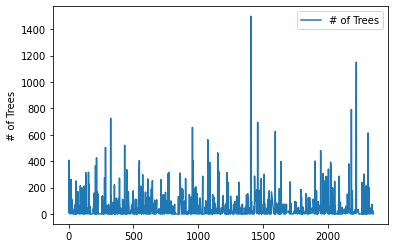

In [22]:
sns.lineplot(data=ss['# of Trees'], label='# of Trees')


<AxesSubplot:ylabel='County'>

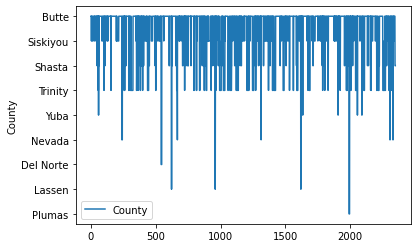

In [21]:
sns.lineplot(data=ss['County'], label='County')

In [30]:
ss.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 124 columns):
 #    Column                                              Non-Null Count  Dtype         
---   ------                                              --------------  -----         
 0    APN                                                 2349 non-null   object        
 1    Structural Status                                   2349 non-null   object        
 2    # of Trees                                          1444 non-null   float64       
 3    Haz Trees Assessment                                1444 non-null   datetime64[ns]
 4    Haz Trees                                           2338 non-null   object        
 5    Haz Tree Only                                       543 non-null    float64       
 6    Hazard Tree Status                                  1443 non-null   object        
 7    Street #                                            2348 non-null   object        
 8

In [71]:
ss['Vehicles Left'] = ss['Number of Vehicles'] - ss['Number of Vehicles Removed']

In [82]:
filt = ss.groupby(['County'])['Number of Vehicles', 'Number of Vehicles Removed', 'Vehicles Left'].sum()
filt.drop('Butte', inplace=True)

<ipython-input-82-6f1497493de0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filt = ss.groupby(['County'])['Number of Vehicles', 'Number of Vehicles Removed', 'Vehicles Left'].sum()


In [41]:
ss['Number of Vehicles Removed'].dtypes

dtype('float64')

In [40]:
ss['Number of Vehicles Removed'] = pd.to_numeric(ss['Number of Vehicles Removed'], errors='coerce')

In [42]:
ss['Number of Vehicles'] = pd.to_numeric(ss['Number of Vehicles'], errors='coerce')

<AxesSubplot:xlabel='County'>

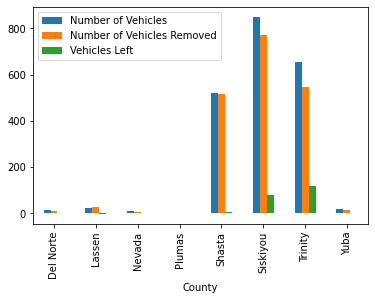

In [83]:
filt.plot(kind='bar')

,Number of Vehicles,Number of Vehicles Removed,Vehicles Left
County,,,
Del Norte,13.0,11.0,2.0
Lassen,22.0,27.0,-5.0
Nevada,9.0,7.0,2.0
Plumas,1.0,1.0,0.0
Shasta,520.0,517.0,7.0
Siskiyou,850.0,771.0,78.0
Trinity,653.0,545.0,116.0
Yuba,20.0,16.0,3.0


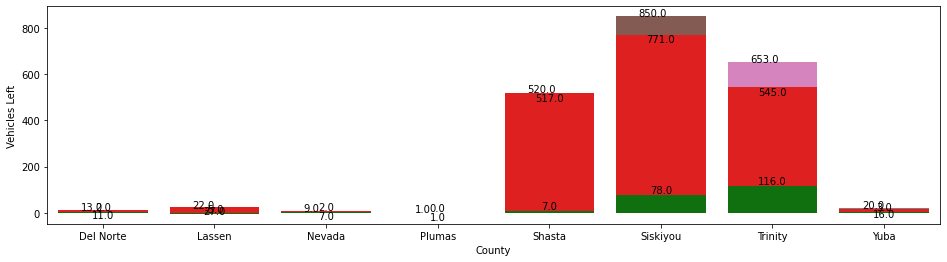

In [84]:
plt.figure(figsize=(16,4))

sns.barplot(x=filt.index, y='Number of Vehicles', data=filt)
sns.barplot(x=filt.index, y='Number of Vehicles Removed', data=filt, color='r')
sns.barplot(x=filt.index, y='Vehicles Left', data=filt, color='g')

for i in range(len(filt)):
    plt.text(i-.2, filt['Number of Vehicles'][i], filt['Number of Vehicles'][i])
    plt.text(i , filt['Number of Vehicles Removed'][i],filt['Number of Vehicles Removed'][i], va='top', ha='center')
    plt.text(i, filt['Vehicles Left'][i],filt['Vehicles Left'][i], va='bottom', ha='center' )

filt

In [86]:
ss['Debris Start'].dtypes

dtype('<M8[ns]')

In [88]:
ss['Debris Finish'].dtype

dtype('<M8[ns]')

In [89]:
ss['Tota days on Site'] = ss['Debris Finish']-ss['Debris Start']

In [130]:
ss.groupby(['County'])[['Tota days on Site']].sum()

,Tota days on Site
County,
Butte,3128.0
Del Norte,10.0
Lassen,17.0
Nevada,15.0
Plumas,10.0
Shasta,276.0
Siskiyou,670.0
Trinity,820.0
Yuba,7.0


In [102]:
ss['Tota days on Site'] = ss['Tota days on Site'].apply(lambda x: x.days)

In [112]:
filt2 = ss.groupby(['County'])[['Tota days on Site']].mean()
round(filt2,2)

,Tota days on Site
County,
Butte,2.76
Del Norte,3.33
Lassen,4.25
Nevada,1.50
Plumas,2.50
Shasta,2.79
Siskiyou,3.00
Trinity,3.87
Yuba,1.17


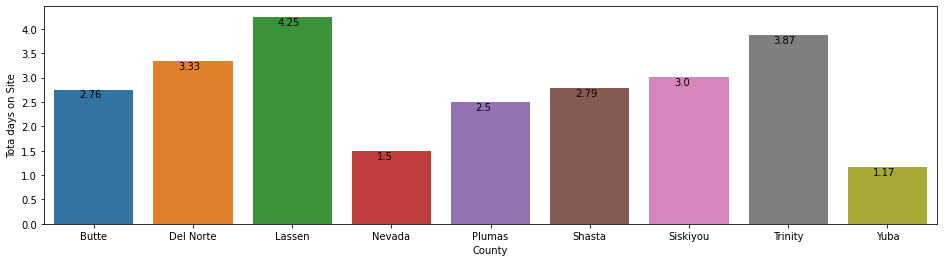

In [127]:
plt.figure(figsize=(16,4))

sns.barplot(x=filt2.index, y='Tota days on Site', data=filt2)

for v in range(len(filt2)):
    plt.text(v-.15, filt2['Tota days on Site'][v],round(filt2['Tota days on Site'][v],2), va='top')